# Steps 1-8: Simulations Setup

In [153]:
import matplotlib.pyplot as plt
import numpy as np


# 1.Create a class 'Solow' with attributes being the parameters of the model (n, s, 𝛿, 𝛼, g);(Cobb_Douglas function)
class Solow:
    def __init__(self, n, s, 𝛿, 𝛼, g):
        self.n, self.s, self.𝛿, self.𝛼, self.g = n, s, 𝛿, 𝛼, g
        
    # 2. Add a method which calculates the RHS of the equation (1), given a value for  𝑘𝑡    
    def calc_next_k(self,k_t):
        return ((self.s*(k_t**self.𝛼) + (1-self.𝛿)*k_t)/((1+self.g)*(1+self.n)))
    
    # 3.Add a method that updates the current value of k_t
    def update_k_t(self, k_t):
        k_t = self.calc_next_k(k_t)
        return k_t
    # 4.Add a method that generates a sequence of values for k_t, for t periods
    def gen_k_sequence(self, k_t, t):
        k_sequence = [k_t]
        for index in range(t):
            k_sequence.append(self.calc_next_k(k_sequence[index]))
        return k_sequence
    
    # 5.Add a method that calculates the steady state
    def calc_steady_state(self):
        return ((self.s)/(self.g + self.n + self.δ + self.g * self.n)) ** (1 / (1 - self.α))   
    
    # 6. Add a method that computes the value of the aggregate variables from a value of  𝑘, 𝐴, and 𝐿
    def calc_aggregate(self, k_t, A_t, L_t):
        agg_var = {}
        K_t = k_t * A_t * L_t
        Y_t = ((k_t * A_t * L_t)**(self.𝛼) * (A_t * L_t)**(1-self.𝛼))
        I_t = Y_t * self.s
        C_t = Y_t * (1-self.s)
        agg_var['K'], agg_var['Y'], agg_var['I'], agg_var['C'] = K_t, Y_t, I_t, C_t
        return agg_var 
    
    # 7. Add a method that computes the per worker variables.
    def calc_per_worker(self, k_t, A_t, L_t):
        agg_var = self.calc_aggregate(k_t, A_t, L_t)
        denominator = A_t*L_t
        pw_var = {} #per-worker variables
        y_t = agg_var["Y"]/denominator #output per efficient worker
        c_t = agg_var["C"]/denominator #consumption per efficient worker
        i_t = agg_var["I"]/denominator #investment per efficient worker
        
        pw_var['k'], pw_var['y'], pw_var['i'], pw_var['c'] = k_t,y_t,i_t,c_t

        return pw_var

    # 8. Add a method that generates a series of per worker variables¶.
    def gen_per_worker_seq(self, k_t, A_t, L_t, t):
        pw_sequence = [] #k, y, i, c
        for index in range(t):
            pw_var = self.calc_per_worker(k_t, A_t, L_t)
            pw_sequence.append(pw_var) #entry starts from period 0
            #update
            k_t = self.calc_next_k(k_t)
            A_t = (1+self.g)*A_t
            L_t = (1+self.n)*L_t
        
        return pw_sequence

example = Solow (n = 0.03, s = 0.3, δ = 0.01, α = 0.3, g = 0.02)
example.calc_next_k(k_t=3)
example.update_k_t(k_t=3)
example.gen_k_sequence(k_t=3, t=5)
example.calc_steady_state()
example.calc_aggregate(k_t=3, A_t=0.3, L_t=500)
example.calc_per_worker(k_t=3, A_t=0.3, L_t=500)
example.gen_per_worker_seq(k_t=3, A_t=0.3, L_t=500, t=5)

[{'k': 3,
  'y': 1.3903891703159088,
  'i': 0.41711675109477264,
  'c': 0.9732724192211362},
 {'k': 3.223983201118192,
  'y': 1.420750544179696,
  'i': 0.42622516325390875,
  'c': 0.9945253809257871},
 {'k': 3.443716478546468,
  'y': 1.4491329005841829,
  'i': 0.43473987017525484,
  'c': 1.014393030408928},
 {'k': 3.6588798628747936,
  'y': 1.4757216371163187,
  'i': 0.4427164911348956,
  'c': 1.033005145981423},
 {'k': 3.869224781440073,
  'y': 1.5006768679547486,
  'i': 0.45020306038642455,
  'c': 1.050473807568324}]

# Step 9: Scenario Analysis
"We now want to use this class for scenario analysis. A scenario is a series of assumptions made on the parameters of the model. We will leave to you to decide which scenarios are interesting to present."

#### Suggestion:
There are likely fewer than 10^70 atoms in our galaxy, and 10^82 in the observable universe. How long can Solow TFP growth last until we reach incredible implications, e.g., when we'd need to sustain the equivalent of the current world economy on each atom?

In [166]:
atoms_galaxy = 10**70
atoms_univ = 10**82      # Note that this is the observable universe

current_world_economy = 70*10**12 #£70 trillion

incredible_output_galaxy = current_world_economy * atoms_galaxy
t_incredible_output_galaxy = incredible_output_galaxy / (10**12)   # In units of trillions

incredible_output_univ = current_world_economy * atoms_univ
t_incredible_output_univ = incredible_output_univ / (10**12)   # In units of trillions

univ_1 = Solow(n = 0.03, s = 0.3, δ = 0.01, α = 0.3, g = 0.02)

# Setting values for the parameters consistent with the current world output
# Units are in trillions of pounds
print(univ_1.calc_aggregate(k_t=2, A_t=0.2, L_t=285)['Y'])

70.1752315606602


In [168]:
# Sequence of aggregate output ending in galaxy-incredible output
# Version 1: Baseline

k=2
A=0.2
L=285
tt=1

while univ_1.gen_per_worker_seq(k, A, L, tt)[-1]['y'] * ( (A*(1+univ_1.g)**(tt+1)) * (L*(1+univ_1.n)**(tt+1)) ) < t_incredible_output_univ:
    tt += 1
print(tt)

pw_seq_univ_1 = univ_1.gen_per_worker_seq(k, A, L, tt)
y_sequence_univ_1 = [year['y'] for year in pw_seq_univ_1]

Y_sequence_univ_1 = []
for i in range(tt):
    Y_sequence_univ_1.append(y_sequence_univ_1[i] * ( (A*(1+univ_1.g)**(i+1)) * (L*(1+univ_1.n)**(i+1)) ))


3815


In [169]:
# Version 2: 100x current TFP, population, and capital per worker

univ_2 = Solow(n = 0.03, s = 0.3, δ = 0.01, α = 0.3, g = 0.02)

k=2*100
A=0.2*100
L=285*100
tt=1

while univ_2.gen_per_worker_seq(k, A, L, tt)[-1]['y'] * ( (A*(1+univ_2.g)**(tt+1)) * (L*(1+univ_2.n)**(tt+1)) ) < t_incredible_output_univ:
    tt += 1
print(tt)

pw_seq_univ_2 = univ_2.gen_per_worker_seq(k, A, L, tt)
y_sequence_univ_2 = [year['y'] for year in pw_seq_univ_2]

Y_sequence_univ_2 = []
for i in range(tt):
    Y_sequence_univ_2.append(y_sequence_univ_2[i] * ( (A*(1+univ_2.g)**(i+1)) * (L*(1+univ_2.n)**(i+1)) ))



3628


In [170]:
# Version 3: 10x TFP growth

univ_3 = Solow(n = 0.03, s = 0.3, δ = 0.01, α = 0.3, g = 0.02*10)

k=2
A=0.2
L=285
tt=1

while univ_3.gen_per_worker_seq(k, A, L, tt)[-1]['y'] * ( (A*(1+univ_3.g)**(tt+1)) * (L*(1+univ_3.n)**(tt+1)) ) < t_incredible_output_univ:
    tt += 1
print(tt)

pw_seq_univ_3 = univ_3.gen_per_worker_seq(k, A, L, tt)
y_sequence_univ_3 = [year['y'] for year in pw_seq_univ_3]

Y_sequence_univ_3 = []
for i in range(tt):
    Y_sequence_univ_3.append(y_sequence_univ_3[i] * ( (A*(1+univ_3.g)**(i+1)) * (L*(1+univ_3.n)**(i+1)) ))


891


In [171]:
# Galaxy Version 4: 10x population growth
univ_4 = Solow(n = 0.03*10, s = 0.3, δ = 0.01, α = 0.3, g = 0.02)

k=2
A=0.2
L=285
tt=1

while univ_4.gen_per_worker_seq(k, A, L, tt)[-1]['y'] * ( (A*(1+univ_4.g)**(tt+1)) * (L*(1+univ_4.n)**(tt+1)) ) < t_incredible_output_univ:
    tt += 1
print(tt)

pw_seq_univ_4 = univ_4.gen_per_worker_seq(k, A, L, tt)
y_sequence_univ_4 = [year['y'] for year in pw_seq_univ_4]

Y_sequence_univ_4 = []
for i in range(tt):
    Y_sequence_univ_4.append(y_sequence_univ_4[i] * ( (A*(1+univ_4.g)**(i+1)) * (L*(1+univ_4.n)**(i+1)) ))


670


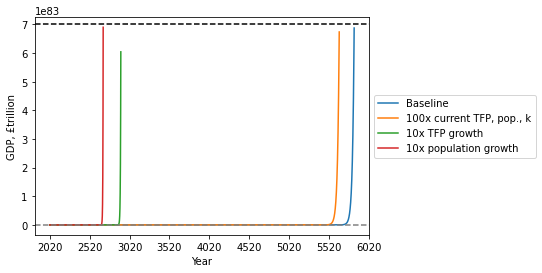

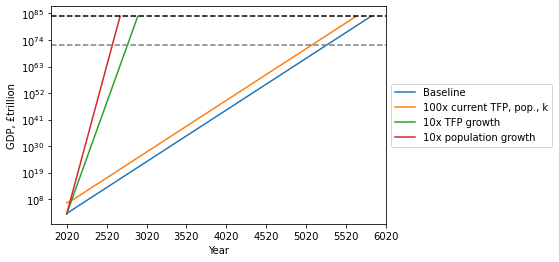

In [189]:
plt.plot(Y_sequence_univ_1, label="Baseline")
plt.plot(Y_sequence_univ_2, label="100x current TFP, pop., k")
plt.plot(Y_sequence_univ_3, label="10x TFP growth")
plt.plot(Y_sequence_univ_4, label="10x population growth")

plt.axhline(y=t_incredible_output_galaxy, color='gray', linestyle='--')
plt.axhline(y=t_incredible_output_univ, color='black', linestyle='--')

# Set x-axis values
x_values = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
# Modify x-axis ticks
x_ticks = [x + 2020 for x in x_values]
plt.xticks(x_values, x_ticks)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("GDP, £trillion")
plt.show()


plt.plot(Y_sequence_univ_1, label="Baseline")
plt.plot(Y_sequence_univ_2, label="100x current TFP, pop., k")
plt.plot(Y_sequence_univ_3, label="10x TFP growth")
plt.plot(Y_sequence_univ_4, label="10x population growth")

plt.axhline(y=t_incredible_output_galaxy, color='gray', linestyle='--')
plt.axhline(y=t_incredible_output_univ, color='black', linestyle='--')

plt.yscale('log')

# Set x-axis values
x_values = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
# Modify x-axis ticks
x_ticks = [x + 2020 for x in x_values]
plt.xticks(x_values, x_ticks)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("GDP, £trillion")

plt.show()

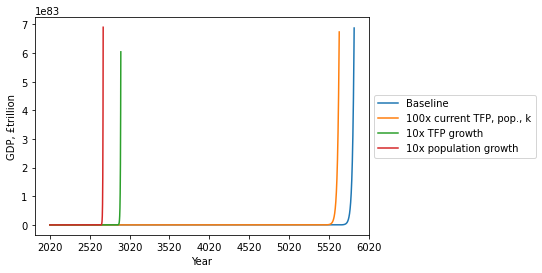

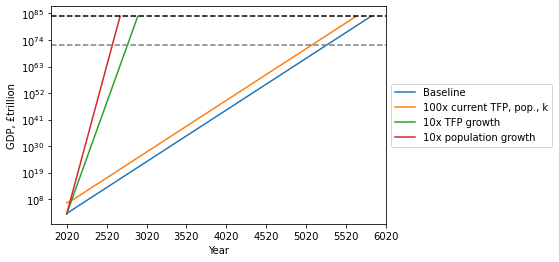

In [190]:
plt.plot(Y_sequence_univ_1, label="Baseline")
plt.plot(Y_sequence_univ_2, label="100x current TFP, pop., k")
plt.plot(Y_sequence_univ_3, label="10x TFP growth")
plt.plot(Y_sequence_univ_4, label="10x population growth")

# Set x-axis values
x_values = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
# Modify x-axis ticks
x_ticks = [x + 2020 for x in x_values]
plt.xticks(x_values, x_ticks)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("GDP, £trillion")
plt.show()


plt.plot(Y_sequence_univ_1, label="Baseline")
plt.plot(Y_sequence_univ_2, label="100x current TFP, pop., k")
plt.plot(Y_sequence_univ_3, label="10x TFP growth")
plt.plot(Y_sequence_univ_4, label="10x population growth")

plt.axhline(y=t_incredible_output_galaxy, color='gray', linestyle='--')
plt.axhline(y=t_incredible_output_univ, color='black', linestyle='--')

plt.yscale('log')

# Set x-axis values
x_values = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
# Modify x-axis ticks
x_ticks = [x + 2020 for x in x_values]
plt.xticks(x_values, x_ticks)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("GDP, £trillion")

plt.show()

SyntaxError: invalid syntax (<ipython-input-188-d1955bf37957>, line 1)